In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torch.nn.functional as F

In [24]:
data = pd.read_excel("35000.xlsx")
data.head()

,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [25]:
data = data[data["IC50"] < 250]

In [26]:
data

,Unnamed: 0,Title,IC50,SMILES
0,NaN,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,NaN,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,NaN,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,NaN,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,NaN,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...
...,...,...,...,...
36213,NaN,CHEMBL5183563,240.400000,CN(C)Cc1nc(on1)[C@@]23C(C)(C)[C@@H](CC2=O)CC3
36214,NaN,CHEMBL4287308,240.800000,C[C@]12C(C)(C)[C@@H](CC2)C[C@H]1OC(=O)CN(CC3)C...
36215,NaN,CHEMBL4791618,245.340000,FC(F)(F)c1ccc(cc1)NC(=C2C(=O)OCC)C(=O)N(c(cc3)...
36216,NaN,CHEMBL2041476,247.494000,OC[C@@H](O)[C@@H](O)[C@H](O1)[C@H](NC(=O)C)[C@...


In [27]:
def mol_dsc_calc(mols):
    return pd.DataFrame(Descriptors.CalcMolDescriptors(Chem.MolFromSmiles(m)) for m in mols)

In [28]:
descriptor_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptor_transformer.transform(data['SMILES'])
X

[10:11:32] Conflicting single bond directions around double bond at index 55.
[10:11:32]   BondStereo set to STEREONONE and single bond directions set to NONE.
[10:16:42] Conflicting single bond directions around double bond at index 7.
[10:16:42]   BondStereo set to STEREONONE and single bond directions set to NONE.


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.743425,11.743425,0.061289,-4.487931,0.216971,362.367,335.151,362.171907,138,0,...,0,0,0,0,0,0,0,0,0,0
1,11.324462,11.324462,0.124444,-0.959020,0.651957,298.383,272.175,298.189257,120,0,...,0,0,0,0,0,0,0,0,0,0
2,11.521766,11.521766,0.025290,-1.252691,0.624022,295.359,272.175,295.166331,118,0,...,0,0,0,0,0,0,0,0,0,0
3,11.271766,11.271766,0.000752,-1.236230,0.681758,283.348,260.164,283.166331,114,0,...,0,0,0,0,0,0,0,0,0,0
4,11.745432,11.745432,0.243422,-1.443615,0.561612,329.268,318.180,329.064785,122,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36213,12.467044,12.467044,0.063489,-0.532510,0.831592,263.341,242.173,263.163377,104,0,...,0,0,0,0,0,0,0,0,0,0
36214,12.445585,12.445585,0.050529,-0.262163,0.727811,352.475,320.219,352.236208,142,0,...,0,0,0,0,0,0,0,0,0,0
36215,13.774427,13.774427,0.044225,-4.608837,0.231216,613.352,594.200,612.048324,204,0,...,0,0,0,0,0,0,0,0,0,0
36216,12.672231,12.672231,0.168260,-1.812170,0.220284,431.398,406.198,431.153994,168,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
idx = X.index[X.isna().any(axis=1)]
X = X.drop(idx, axis=0)
X = X.reset_index(drop=True)
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,11.743425,11.743425,0.061289,-4.487931,0.216971,362.367,335.151,362.171907,138,0,...,0,0,0,0,0,0,0,0,0,0
1,11.324462,11.324462,0.124444,-0.959020,0.651957,298.383,272.175,298.189257,120,0,...,0,0,0,0,0,0,0,0,0,0
2,11.521766,11.521766,0.025290,-1.252691,0.624022,295.359,272.175,295.166331,118,0,...,0,0,0,0,0,0,0,0,0,0
3,11.271766,11.271766,0.000752,-1.236230,0.681758,283.348,260.164,283.166331,114,0,...,0,0,0,0,0,0,0,0,0,0
4,11.745432,11.745432,0.243422,-1.443615,0.561612,329.268,318.180,329.064785,122,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,12.467044,12.467044,0.063489,-0.532510,0.831592,263.341,242.173,263.163377,104,0,...,0,0,0,0,0,0,0,0,0,0
36208,12.445585,12.445585,0.050529,-0.262163,0.727811,352.475,320.219,352.236208,142,0,...,0,0,0,0,0,0,0,0,0,0
36209,13.774427,13.774427,0.044225,-4.608837,0.231216,613.352,594.200,612.048324,204,0,...,0,0,0,0,0,0,0,0,0,0
36210,12.672231,12.672231,0.168260,-1.812170,0.220284,431.398,406.198,431.153994,168,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
y = data["IC50"]
y = y.drop(idx, axis=0)
y = y.reset_index(drop=True)
y = y.to_numpy()
y

array([1.45000e-05, 1.59000e-05, 3.34000e-05, ..., 2.45340e+02,
       2.47494e+02, 2.47752e+02])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(random_state=0)
grad_boost.fit(X_train, y_train)

In [33]:
X_train = torch.from_numpy(X_train).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)

In [34]:
class NN(nn.Module):
    def __init__(self, n_feature, n_hidden_1, n_hidden_2, n_hidden_3):
        super(NN, self).__init__()
        self.l_1 = nn.Linear(n_feature, n_hidden_1)
        self.l_2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.l_3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.l_4 = nn.Linear(n_hidden_3, 1)

    def forward(self, x):
        x = x.to(torch.float32)
        x = F.gelu(self.l_1(x))
        x = F.gelu(self.l_2(x))
        x = F.gelu(self.l_3(x))
        x = self.l_4(x)
        return x

In [35]:
n_feautures = 209
n_hidden_1 = 150
n_hidden_2 = 50
n_hidden_3 = 10
learning_rate = 0.001
batch_size = 30

In [62]:
model = NN(n_feautures, n_hidden_1, n_hidden_2, n_hidden_3)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [37]:
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [61]:
def train(epoch, loss_vector, log_interval=100):
    model.train()
    train_loss, count = 0, 0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = torch.sqrt(criterion(output, target.unsqueeze(1)))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()

        train_loss += loss.data.item()

        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.data.item(),
                )
            )

    loss_vector.append(train_loss / len(train_loader))

def test(loss_vector):
    model.eval()  # Set model to evaluation mode
    test_loss, count = 0, 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        loss = torch.sqrt(criterion(output, target.unsqueeze(1)))
        test_loss += loss.data.item()
    
    print("Validation set: Average loss: {:.10f}\n".format(test_loss / len(test_loader)))
    loss_vector.append(test_loss / len(test_loader))

In [63]:
epochs = 10

loss_train, loss_test = [], []
for epoch in range(1, epochs + 1):
    train(epoch, loss_train)
    test(loss_test)

Train Epoch: 1 [0/25348 (0%)]	Loss: 7.387654
Train Epoch: 1 [3000/25348 (12%)]	Loss: 3.144881
Train Epoch: 1 [6000/25348 (24%)]	Loss: 9.637182
Train Epoch: 1 [9000/25348 (36%)]	Loss: 40.484528
Train Epoch: 1 [12000/25348 (47%)]	Loss: 2.942526
Train Epoch: 1 [15000/25348 (59%)]	Loss: 16.933908
Train Epoch: 1 [18000/25348 (71%)]	Loss: 2.753414
Train Epoch: 1 [21000/25348 (83%)]	Loss: 14.110334
Train Epoch: 1 [24000/25348 (95%)]	Loss: 15.132232
Validation set: Average loss: 9.1972777476

Train Epoch: 2 [0/25348 (0%)]	Loss: 20.702602
Train Epoch: 2 [3000/25348 (12%)]	Loss: 2.646344
Train Epoch: 2 [6000/25348 (24%)]	Loss: 2.740004
Train Epoch: 2 [9000/25348 (36%)]	Loss: 3.558513
Train Epoch: 2 [12000/25348 (47%)]	Loss: 3.801485
Train Epoch: 2 [15000/25348 (59%)]	Loss: 2.969004
Train Epoch: 2 [18000/25348 (71%)]	Loss: 4.172476
Train Epoch: 2 [21000/25348 (83%)]	Loss: 4.881216
Train Epoch: 2 [24000/25348 (95%)]	Loss: 6.729990
Validation set: Average loss: 8.9766093020

Train Epoch: 3 [0/25348

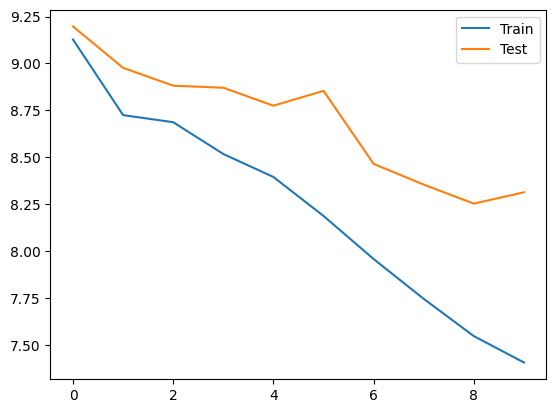

In [64]:
plt.plot(loss_train, label="Train")
plt.plot(loss_test, label="Test")
plt.legend()

In [65]:
model.eval()

y_pred_train = model(X_train)
y_pred_test = model(X_test)

In [66]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mean_absolute_percentage_error(y_test.tolist(), y_pred_test.tolist())
train_rmse = mean_squared_error(y_pred_train.tolist(), y_train.tolist()) ** .5
test_rmse = mean_squared_error(y_pred_test.tolist(), y_test.tolist()) ** .5

print(train_rmse, "//////", test_rmse)

10.153911928715733 ////// 11.263882875161192


Text(0.5, 1.0, 'Test')

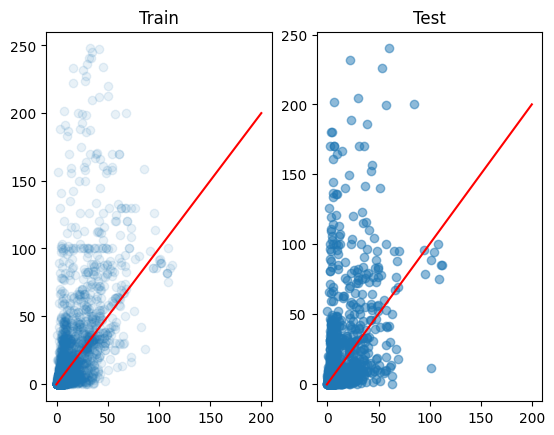

In [67]:
plt.subplot(1, 2, 1)
plt.plot([-0.5, 200], [-0.5, 200], color="red")
#plt.xlim(-0.1, 250)
#plt.ylim(-0.1, 250)
plt.scatter(np.array(y_pred_train.tolist()).flatten(), np.array(y_train.tolist()).flatten(), alpha=0.1)
plt.title("Train")

plt.subplot(1, 2, 2)
plt.plot([-0.5, 200], [-0.5, 200], color="red")
#plt.xlim(-0.1, 250)
#plt.ylim(-0.1, 250)
plt.scatter(np.array(y_pred_test.tolist()).flatten(), np.array(y_test.tolist()).flatten(), alpha=0.5)
plt.title("Test")

In [68]:
f"{y.min()}, {y.max()}, {y.mean()}, {y.std()}"

'9.97e-06, 247.752, 5.689943185231637, 12.929511519798474'